In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [100]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

path = kagglehub.dataset_download("jainpooja/fake-news-detection")
print(path)

/root/.cache/kagglehub/datasets/jainpooja/fake-news-detection/versions/1


In [101]:
import os

print(os.listdir("/root/.cache/kagglehub/datasets/jainpooja/fake-news-detection/versions/1"))

['True.csv', 'Fake.csv']


In [102]:
df_fake = pd.read_csv("/root/.cache/kagglehub/datasets/jainpooja/fake-news-detection/versions/1/Fake.csv")
df_true = pd.read_csv("/root/.cache/kagglehub/datasets/jainpooja/fake-news-detection/versions/1/True.csv")

In [103]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [104]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [105]:
df_fake["class"] = 0
df_true["class"] = 1

In [106]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [107]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [108]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-108-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-108-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [109]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [110]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [111]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [112]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [113]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

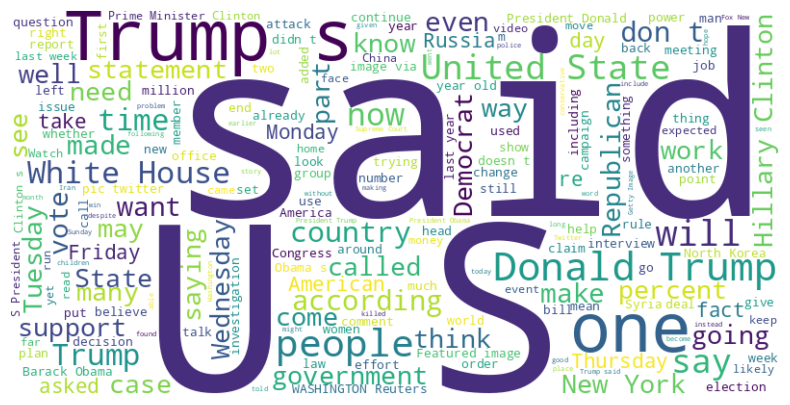

In [114]:
from wordcloud import WordCloud

# Joindre tout le texte de la colonne "text"
texte = " ".join(df["text"].dropna())  # Supprime les valeurs NaN pour éviter les erreurs

# Créer l'objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texte)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Enlever les axes
plt.show()


In [115]:
df.isnull().sum()

,0
text,0
class,0


In [116]:
df = df.sample(frac = 1)

In [117]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [118]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [119]:
df["text"] = df["text"].apply(wordopt)

In [120]:
x = df["text"]
y = df["class"]

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [124]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [125]:
pred_lr=LR.predict(xv_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5807
           1       0.98      0.99      0.98      5413

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [126]:
from xgboost import XGBClassifier

In [127]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [128]:
xgb_model.fit(xv_train, y_train)
xgb_pred = xgb_model.predict(xv_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:53:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [129]:
print("XGBoost Performance:\n", classification_report(y_test, xgb_pred))

XGBoost Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5807
           1       1.00      1.00      1.00      5413

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [130]:
import joblib

joblib.dump(vectorization, "tfidf_vectorizer.pkl")

# Sauvegarder le modèle
joblib.dump(xgb_model, "model.pkl")

['model.pkl']

In [131]:
df_manual_testing = df_manual_testing.reset_index(drop=True)

# Access the first element of the 'text' column using the new index
test = df_manual_testing["text"][15]

In [132]:
test

'BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they 

In [133]:
test = "kjsnckjdncNDVNDKJVNdnvfjnvKJDVNFKJVNFKVNVdkljvfn"

In [134]:
new_xv_test = vectorization.transform([test])

In [135]:
print(xgb_model.predict(new_xv_test))

[0]


In [136]:
credibility_score = xgb_model.predict_proba(new_xv_test)

In [137]:
credibility_score

array([[1., 0.]], dtype=float32)

In [138]:
import numpy as np

probas_percent = credibility_score * 100

# Contrôle de l'affichage
#np.set_printoptions(precision=2, suppress=True)  # Affichage avec 2 décimales sans arrondi excessif
print(probas_percent)

[[99.84  0.16]]


In [139]:
import joblib

model = joblib.load("/content/model.pkl")
vectorizer = joblib.load("/content/tfidf_vectorizer.pkl")

test_v = vectorizer.transform([test])
prediction = model.predict(test_v)

In [140]:
prediction

array([0])

In [141]:
test = """
Bernard Squarcini, ancien patron du renseignement, condamné à quatre ans de prison dont deux ferme pour des activités illicites, notamment au profit de LVMH
L’ancien chef de la direction centrale du renseignement intérieur était soupçonné d’avoir profité de ses réseaux pour obtenir informations confidentielles et privilèges au bénéfice, notamment, du PDG de LVMH, Bernard Arnault.
"""

In [142]:
test_v = vectorizer.transform([test])
prediction = model.predict(test_v)

In [143]:
prediction_proba = model.predict_proba(test_v)

In [145]:
print(prediction_proba)

[[1. 0.]]


In [147]:
print(round(prediction_proba[0][1] * 100)

0.16180828679353
